In [1]:
import numpy as np
import csv
import pickle
import math

Init dico keys = authors , values = associated papers

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
DicoCleaned = {}
infile = open('/content/gdrive/My Drive/pickle_files/authors_with_all_abstracts_separated_cleaned.pkl', 'rb')

Mounted at /content/gdrive


In [3]:
DicoCleaned = pickle.load(infile)
infile.close()
print(len(DicoCleaned))

217801


Read csv file with authorsID and their associated H index

In [4]:
authors_index_list = []
with open("train.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        authors_index_list.append(row)
authors_index_list = np.array(authors_index_list)

In [5]:
print(authors_index_list.shape)

(174241, 2)


Get the top 10% of the authors (h-index wise)

In [14]:
ten_percent = math.floor(authors_index_list.shape[0]/10)
h_indices = authors_index_list[:,1].astype(np.float).astype(int)
top_ind = np.argpartition(h_indices, -ten_percent)[-ten_percent:]

Get the respective author IDs

In [15]:
top_authors_index = authors_index_list[top_ind]

Just for information get min & max h-index of the top 10% authors

In [16]:
top_hindices= top_authors_index[:,1].astype(np.float)
maxh = np.amax(top_hindices)
minh = np.amin(top_hindices)
print(f'h-index max :  {maxh} , min :  {minh}')

h-index max :  187.0 , min :  24.0


It might be better to find a threshold than the top 10%


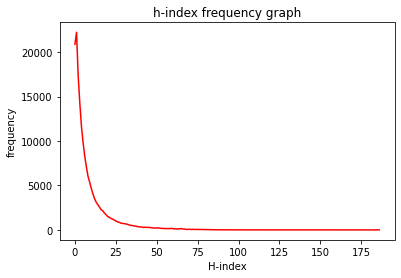

In [17]:
import matplotlib.pyplot as plt
h_indices_INT = h_indices.astype(np.float).astype(int)
y = np.bincount(h_indices_INT)
plt.title("h-index frequency graph")
plt.xlabel("H-index")
plt.ylabel("frequency")
plt.plot(y[1:], color ="red")
plt.show()

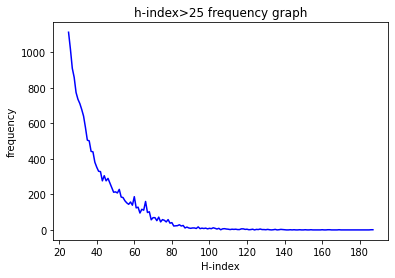

In [18]:
plt.title("h-index>25 frequency graph")
plt.xlabel("H-index")
plt.ylabel("frequency")
plt.plot( np.arange(25, y.shape[0]), y[25:], color ="blue")
plt.show()

TODO : test with threshold higher than 25 instead

Get the worst 10 % of authors

In [19]:
worst_ind = np.argpartition(h_indices, ten_percent)[:ten_percent]
worst_authors_index = authors_index_list[worst_ind]
worst_indices= worst_authors_index[:,1].astype(np.float)
maxh = np.amax(worst_indices)
minh = np.amin(worst_indices)
print(f'h-index max :  {maxh} , min :  {minh}')

h-index max :  1.0 , min :  1.0


WORK WITH TOP 10% AUTHORS HERE (later with threshold)

Get the abstracts of top 10 from dico

In [20]:
dico_top10 = {}
for authorid in top_authors_index[:,0]:
  dico_top10[authorid] = DicoCleaned[authorid]

Concatenate all abstracts in txt file to use library for word frequency directly on it after

In [21]:
all_abs = []
for author in dico_top10:
    all_abs.append(' '.join(dico_top10[author]))

textfile = open("all_abs.txt", "w")
for element in all_abs:
    textfile.write(element + "\n")
textfile.close()


Reprocess to take out most common english words (the,we ...) because we have missed the uppercases


In [22]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
from nltk.corpus import stopwords
s = set(stopwords.words('english'))
s_nb = {'0','1','2', '3', '4', '5', '6','7','8','9'}
s = set.union(s, s_nb)
txt = open('all_abs.txt').read().lower()
filtertxt =  filter(lambda w: not w in s,txt.split())
list_all_abs_cleaned = list(filtertxt)

Just to verify it works on small txt file and it does

In [37]:
txt2 = open('teststr.txt').read().lower()
filtertxt2 =  filter(lambda w: not w in s,txt2.split())

In [38]:
print(type(filtertxt2))
print(list(filtertxt2))
print(type(list(filtertxt2)))

<class 'filter'>
['test', 'see', '47', 'works', 'lol', 'test', 'hello', 'machine']
<class 'list'>


In [50]:
#delete file so that we can rewrite it without stopwords
import os
filePath = 'all_abs.txt';
# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
if os.path.exists(filePath):
    os.remove(filePath)

textfile = open("all_abs.txt", "w")
for element in list_all_abs_cleaned:
    textfile.write(element + " ")
textfile.close()

Find the 10 most common words of top 10% authors

In [51]:
import re
from collections import Counter
words = re.findall(r'\w+', open('all_abs.txt').read().lower())
top10_words = Counter(words).most_common(10)

In [52]:
top10_words

[('data', 70683),
 ('based', 38381),
 ('model', 37054),
 ('results', 33912),
 ('using', 31416),
 ('system', 26654),
 ('also', 25473),
 ('high', 24905),
 ('two', 24828),
 ('paper', 24756)]

100 most common words


In [ ]:
top100_words = Counter(words).most_common(100)
top100_words

Do the same for worst 10%

In [48]:
dico_worst10 = {}
for authorid in worst_authors_index[:,0]:
  dico_worst10[authorid] = DicoCleaned[authorid]

all_abs_worst = []
for author in dico_worst10:
    all_abs_worst.append(' '.join(dico_worst10[author]))

textfile = open("all_abs_worst.txt", "w")
for element in all_abs_worst:
    textfile.write(element + "\n")
textfile.close()

s = set(stopwords.words('english'))
s_nb = {'0','1','2', '3', '4', '5', '6','7','8','9'}
s = set.union(s, s_nb)
txt = open('all_abs_worst.txt').read().lower()
filtertxt =  filter(lambda w: not w in s,txt.split())
list_all_abs_cleaned = list(filtertxt)

filePath = 'all_abs_worst.txt';
if os.path.exists(filePath):
  os.remove(filePath)

textfile = open("all_abs_worst.txt", "w")
for element in list_all_abs_cleaned:
    textfile.write(element + " ")
textfile.close()

words = re.findall(r'\w+', open('all_abs_worst.txt').read().lower())
worst10_words = Counter(words).most_common(10)
worst10_words

[('data', 27045),
 ('system', 21900),
 ('based', 19098),
 ('paper', 17200),
 ('using', 12523),
 ('information', 12080),
 ('model', 10812),
 ('systems', 10767),
 ('web', 10683),
 ('used', 9943)]